<a href="https://colab.research.google.com/github/SrimanKakkunuri/Groundwater-Level-Prediction-/blob/main/final5models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error (MSE): 0.66
Root Mean Squared Error (RMSE): 0.81
Mean Absolute Error (MAE): 0.70
R²: 0.73
Nash-Sutcliffe Efficiency (NSE): 0.73
Standard Deviation (STD) of Residuals: 0.79


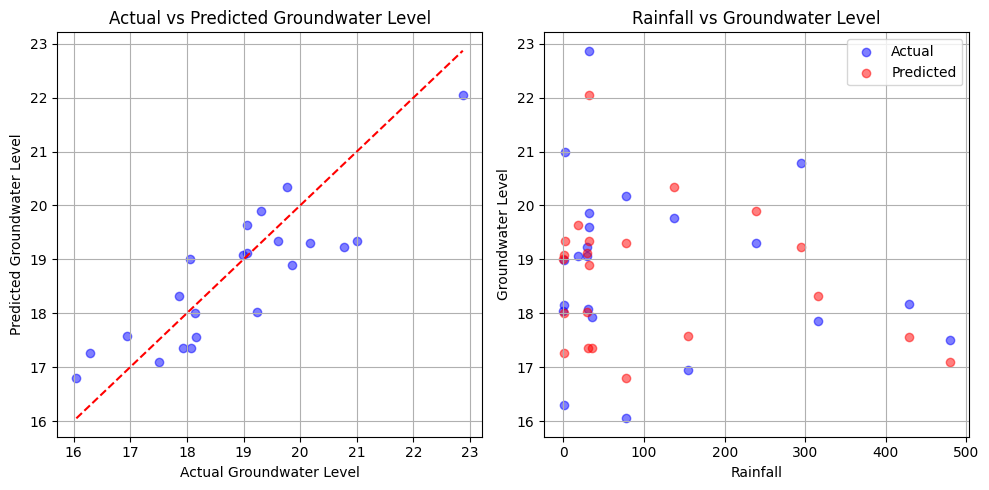

In [ ]:
#MLR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def calculate_nse(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)


df = pd.read_csv('/content/Data(GW+Rainfall+Temp)_Final.csv')


X = df[['Rainfall', 'Temperature', 'Previous GWL']]
y = df['Groundwater Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
nse = calculate_nse(y_test, y_pred)
std_residuals = np.std(y_test - y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Nash-Sutcliffe Efficiency (NSE): {nse:.2f}')
print(f'Standard Deviation (STD) of Residuals: {std_residuals:.2f}')




plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, c='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Groundwater Level')
plt.ylabel('Predicted Groundwater Level')
plt.title('Actual vs Predicted Groundwater Level')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(X_test['Rainfall'], y_test, c='b', label='Actual', alpha=0.5)
plt.scatter(X_test['Rainfall'], y_pred, c='r', label='Predicted', alpha=0.5)
plt.xlabel('Rainfall')
plt.ylabel('Groundwater Level')
plt.title('Rainfall vs Groundwater Level')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 119ms/step
Mean Squared Error (MSE): 5.52
Root Mean Squared Error (RMSE): 2.35
Mean Absolute Error (MAE): 1.88
R²: -1.29
Nash-Sutcliffe Efficiency (NSE): -1.29
Standard Deviation (STD) of Residuals: 2.33


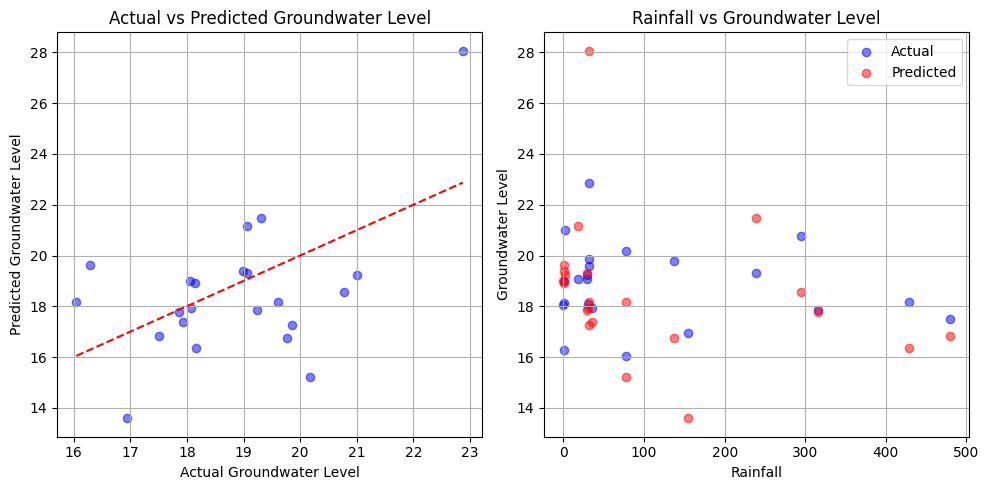

In [ ]:
#ANN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def calculate_nse(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)


df = pd.read_csv('/content/Data(GW+Rainfall+Temp)_Final.csv')


X = df[['Rainfall', 'Temperature', 'Previous GWL']]
y = df['Groundwater Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)


y_pred = model.predict(X_test_scaled).flatten()


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
nse = calculate_nse(y_test, y_pred)
std_residuals = np.std(y_test - y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Nash-Sutcliffe Efficiency (NSE): {nse:.2f}')
print(f'Standard Deviation (STD) of Residuals: {std_residuals:.2f}')


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, c='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Groundwater Level')
plt.ylabel('Predicted Groundwater Level')
plt.title('Actual vs Predicted Groundwater Level')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(X_test['Rainfall'], y_test, c='b', label='Actual', alpha=0.5)
plt.scatter(X_test['Rainfall'], y_pred, c='r', label='Predicted', alpha=0.5)
plt.xlabel('Rainfall')
plt.ylabel('Groundwater Level')
plt.title('Rainfall vs Groundwater Level')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 0.75
Root Mean Squared Error (RMSE): 0.86
Mean Absolute Error (MAE): 0.72
R²: 0.69
Nash-Sutcliffe Efficiency (NSE): 0.69
Standard Deviation (STD) of Residuals: 0.83


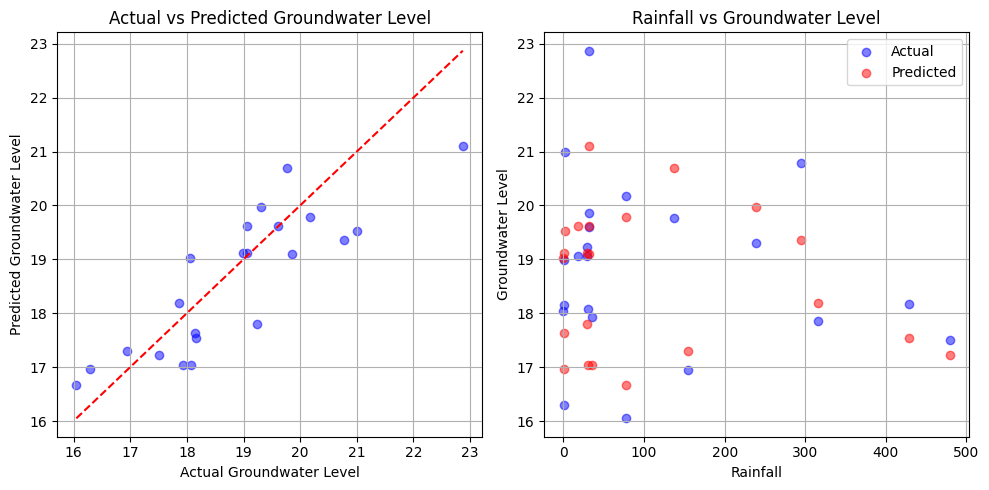

In [ ]:
#SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def calculate_nse(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)


df = pd.read_csv('/content/Data(GW+Rainfall+Temp)_Final.csv')


X = df[['Rainfall', 'Temperature', 'Previous GWL']]
y = df['Groundwater Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
nse = calculate_nse(y_test, y_pred)
std_residuals = np.std(y_test - y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Nash-Sutcliffe Efficiency (NSE): {nse:.2f}')
print(f'Standard Deviation (STD) of Residuals: {std_residuals:.2f}')



plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, c='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Groundwater Level')
plt.ylabel('Predicted Groundwater Level')
plt.title('Actual vs Predicted Groundwater Level')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(X_test['Rainfall'], y_test, c='b', label='Actual', alpha=0.5)
plt.scatter(X_test['Rainfall'], y_pred, c='r', label='Predicted', alpha=0.5)
plt.xlabel('Rainfall')
plt.ylabel('Groundwater Level')
plt.title('Rainfall vs Groundwater Level')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 0.79
Root Mean Squared Error (RMSE): 0.89
Mean Absolute Error (MAE): 0.76
R²: 0.67
Nash-Sutcliffe Efficiency (NSE): 0.67
Standard Deviation (STD) of Residuals: 0.86


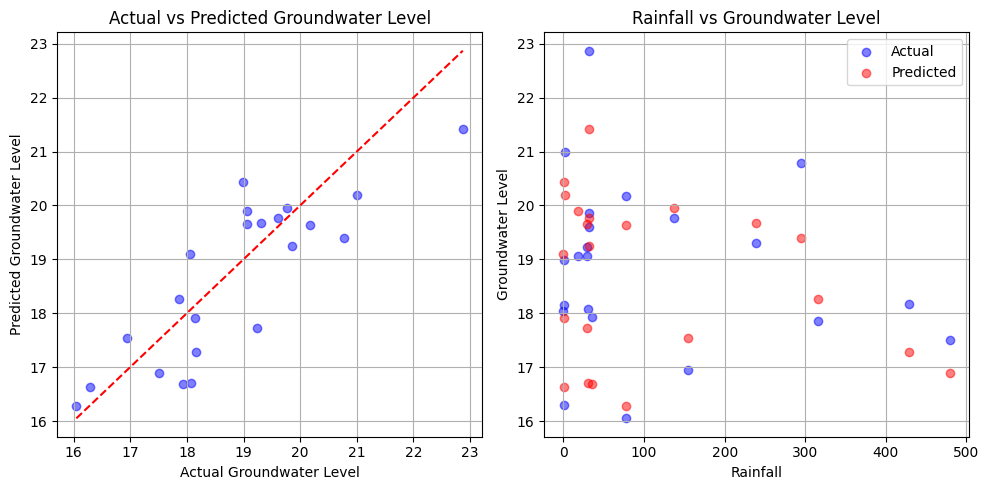

In [ ]:
#RF
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def calculate_nse(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)


df = pd.read_csv('/content/Data(GW+Rainfall+Temp)_Final.csv')


X = df[['Rainfall', 'Temperature', 'Previous GWL']]
y = df['Groundwater Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
nse = calculate_nse(y_test, y_pred)
std_residuals = np.std(y_test - y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Nash-Sutcliffe Efficiency (NSE): {nse:.2f}')
print(f'Standard Deviation (STD) of Residuals: {std_residuals:.2f}')


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, c='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Groundwater Level')
plt.ylabel('Predicted Groundwater Level')
plt.title('Actual vs Predicted Groundwater Level')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(X_test['Rainfall'], y_test, c='b', label='Actual', alpha=0.5)
plt.scatter(X_test['Rainfall'], y_pred, c='r', label='Predicted', alpha=0.5)
plt.xlabel('Rainfall')
plt.ylabel('Groundwater Level')
plt.title('Rainfall vs Groundwater Level')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 1.40
Root Mean Squared Error (RMSE): 1.18
Mean Absolute Error (MAE): 0.97
R²: 0.42
Nash-Sutcliffe Efficiency (NSE): 0.42
Standard Deviation (STD) of Residuals: 1.15


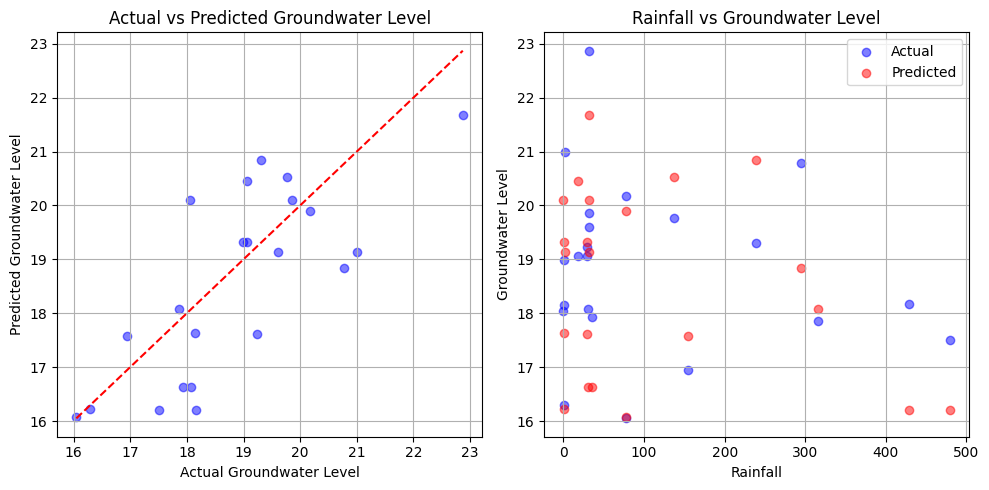

In [ ]:
#DT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def calculate_nse(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)


df = pd.read_csv('/content/Data(GW+Rainfall+Temp)_Final.csv')


X = df[['Rainfall', 'Temperature', 'Previous GWL']]
y = df['Groundwater Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
nse = calculate_nse(y_test, y_pred)
std_residuals = np.std(y_test - y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Nash-Sutcliffe Efficiency (NSE): {nse:.2f}')
print(f'Standard Deviation (STD) of Residuals: {std_residuals:.2f}')


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, c='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Groundwater Level')
plt.ylabel('Predicted Groundwater Level')
plt.title('Actual vs Predicted Groundwater Level')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_test['Rainfall'], y_test, c='b', label='Actual', alpha=0.5)
plt.scatter(X_test['Rainfall'], y_pred, c='r', label='Predicted', alpha=0.5)
plt.xlabel('Rainfall')
plt.ylabel('Groundwater Level')
plt.title('Rainfall vs Groundwater Level')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
